# traer data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-03-10 18:53:36.483969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-10 18:53:36.484008: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#bring your data!
path = '/home/lucaspancotto/code/JoacoSoulez/mental_health_first_aid_evaluation/reddit_uncored2.csv'
data = pd.read_csv(f'{path}')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.dropna(inplace=True)
data.head()

,text,label,clean,uncored
0,I recently went through a breakup and she said...,1,i recently went through a breakup and she said...,i recently went through a breakup and she said...
1,"I do not know how to navigate these feelings, ...",1,i do not know how to navigate these feelings n...,i do 0 0 how to navigate these 0 0 tha...
2,"So I have been with my bf for 5 months , and h...",1,so i have been with my bf for months and he ...,so i have been with my bf for 0 and he alrea...
3,I am so exhausted of this. Just when I think I...,0,i am so exhausted of this just when i think i ...,i am so exhausted of this just when i 0 i 0...
4,I have been severly bullied since i was 5 till...,1,i have been severly bullied since i was till ...,i have been severly bullied 0 i was till thi...


In [3]:
print('null values:\n \n',data.isnull().sum())


null values:
 
 text       0
label      0
clean      0
uncored    0
dtype: int64


## train test split


In [4]:
X = data.uncored
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.3 )


In [5]:
print('length of X_train',len(X_train), 'length of X_test',len(X_test), 'length of y_train',len(y_train), 'length of y_test',len(y_test))

length of X_train 14252 length of X_test 6109 length of y_train 14252 length of y_test 6109


In [6]:
X_train

2498     just  0  to wait  0  more  0  before i  0  fin...
14385    that is how i  0   0  i  0  to let  0  of all ...
11760    i spend most of my  0  with family i  0  them ...
9357     my  0  is  0  defined by the  0  who do or do ...
7198      0  is  0  of the absolute worst  0  your brai...
                               ...                        
19393    yo male really struggling  0   0  hitting the ...
7869     i do  0   0  where to write so i am writing he...
14711    it  0   0   0   0  me  0   0  to do  0  then a...
9921     but  0   0   0  wrong  0   0  my family  0  me...
18983    i  0  my  0  is a mistake from the moment i wa...
Name: uncored, Length: 14252, dtype: object

## word tokenize and word 2 vec

In [7]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [8]:


X_train = [word_tokenize(str(_)) for _ in X_train]
X_test = [word_tokenize(str(_)) for _ in X_test]



In [9]:


# This line trains an entire embedding for the words in your train set
word2vec = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=5)

In [10]:
word2vec.wv.index_to_key

['0',
 'i',
 'to',
 'and',
 'my',
 'the',
 'a',
 'am',
 'it',
 'of',
 'is',
 'have',
 'me',
 'do',
 'that',
 'but',
 'just',
 'for',
 'this',
 'so',
 'was',
 'with',
 'be',
 'you',
 'on',
 'all',
 'or',
 'myself',
 'about',
 'because',
 'will',
 'what',
 'if',
 'at',
 'no',
 'they',
 'been',
 'out',
 'up',
 'are',
 'how',
 'as',
 'when',
 'now',
 'she',
 'had',
 'really',
 'from',
 'there',
 'her',
 'its',
 'he',
 'them',
 'did',
 'being',
 'only',
 'more',
 'has',
 'who',
 'an',
 'we',
 'why',
 'any',
 'some',
 'then',
 'does',
 'too',
 'by',
 'family',
 'here',
 'after',
 'other',
 'over',
 'him',
 'again',
 'than',
 'happy',
 'where',
 'should',
 'your',
 'try',
 'through',
 'doing',
 'off',
 'very',
 'trying',
 'parents',
 'were',
 'which',
 'before',
 'school',
 'living',
 'their',
 'down',
 'having',
 'few',
 'world',
 'told',
 'made',
 'enough',
 'maybe',
 'felt',
 'most',
 'worse',
 'else',
 'first',
 'well',
 'these',
 'same',
 'own',
 'done',
 'while',
 'lost',
 'many',
 'anx

# data embedding

## embed data

In [11]:
def embed_sentence(word2vec, sentence):
    # $CHALLENGIFY_BEGIN
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

In [12]:
def embedding(word2vec, sentences):
    # $CHALLENGIFY_BEGIN
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed
    # $CHALLENGIFY_END
    
X_train = embedding(word2vec, X_train)
X_test = embedding(word2vec, X_test)

## pad data

In [13]:
'''X_train_pad = pad_sequences(X_train, dtype='float', padding='post')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post')'''

"X_train_pad = pad_sequences(X_train, dtype='float', padding='post')\nX_test_pad = pad_sequences(X_test, dtype='float', padding='post')"

In [14]:
print('number of train texts: ' ,len(X_train))
X_train[3].shape[0]

number of train texts:  14252


59

In [15]:
text_word_lengths = [X_train[i].shape[0] for i in np.arange(len(X_train))]
text_word_lengths_test = [X_test[i].shape[0] for i in np.arange(len(X_test))]

<AxesSubplot:title={'center':'test data lengths'}, ylabel='Count'>

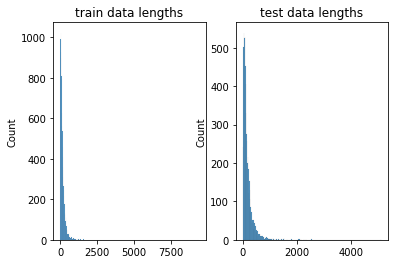

In [16]:
plt.figure()
plt.subplot(1,2,1)
plt.title('train data lengths')
sns.histplot(text_word_lengths)
plt.subplot(1,2,2)
plt.title('test data lengths')
sns.histplot(text_word_lengths_test)

In [17]:
#cortamos en 500 words

X_train_pad = pad_sequences(X_train, dtype='float', padding='post', maxlen= 500,truncating= 'post')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post', maxlen = 500 , truncating = 'post')


# the model

## baseline score

In [18]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Number of labels in train set', counts)

y_pred = 0 if counts[0] > counts[1] else 1

print('Baseline accuracy: ', accuracy_score(y_test, [y_pred]*len(y_test)))

Number of labels in train set {0: 6988, 1: 7264}
Baseline accuracy:  0.5085938778850876


## first neural network

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

def init_model():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(20, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(10, activation='tanh'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy', 'AUC','Precision','Recall'])
    
    return model

model = init_model()

2022-03-10 18:54:07.055341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-10 18:54:07.055397: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-10 18:54:07.055425: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-QMHRL2V): /proc/driver/nvidia/version does not exist
2022-03-10 18:54:07.055773: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, restore_best_weights=True)

history_fit = model.fit(X_train_pad, y_train, 
          batch_size = 32,
          epochs=100,
          validation_split=0.3,
          callbacks=[es],
          verbose = 1
         )

2022-03-10 18:54:12.910027: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1995200000 exceeds 10% of free system memory.


Epoch 1/100
312/312 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.5392 - auc: 0.5563 - precision: 0.5461 - recall: 0.5317

2022-03-10 18:58:40.483956: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 855200000 exceeds 10% of free system memory.


312/312 [==============================] - 286s 849ms/step - loss: 0.6872 - accuracy: 0.5392 - auc: 0.5563 - precision: 0.5461 - recall: 0.5317 - val_loss: 0.6805 - val_accuracy: 0.5538 - val_auc: 0.6055 - val_precision: 0.6396 - val_recall: 0.3166
Epoch 2/100
312/312 [==============================] - 177s 565ms/step - loss: 0.6728 - accuracy: 0.5872 - auc: 0.6132 - precision: 0.5965 - recall: 0.5703 - val_loss: 0.6770 - val_accuracy: 0.5627 - val_auc: 0.6320 - val_precision: 0.6727 - val_recall: 0.3026
Epoch 3/100
312/312 [==============================] - 170s 545ms/step - loss: 0.6611 - accuracy: 0.6113 - auc: 0.6442 - precision: 0.6231 - recall: 0.5875 - val_loss: 0.6565 - val_accuracy: 0.6160 - val_auc: 0.6606 - val_precision: 0.6536 - val_recall: 0.5497
Epoch 4/100
312/312 [==============================] - 172s 550ms/step - loss: 0.6532 - accuracy: 0.6252 - auc: 0.6597 - precision: 0.6518 - recall: 0.5574 - val_loss: 0.6479 - val_accuracy: 0.6235 - val_auc: 0.6699 - val_precisi

In [21]:
import joblib
joblib.dump(model, 'rnn_reddit.sav')

2022-03-10 19:24:49.067663: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://849c2deb-a514-4095-ab82-9e0451bf807c/assets


INFO:tensorflow:Assets written to: ram://849c2deb-a514-4095-ab82-9e0451bf807c/assets


['rnn_reddit.sav']

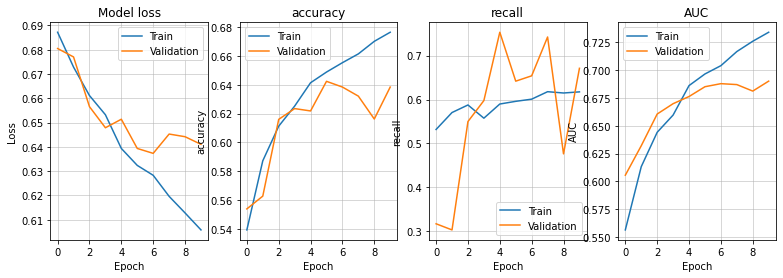

In [22]:
def plot_loss_mae(history):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    #ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('accuracy')
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('Epoch')
    #ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    
    
    ax3.plot(history.history['recall'])
    ax3.plot(history.history['val_recall'])
    ax3.set_title('recall')
    ax3.set_ylabel('recall')
    ax3.set_xlabel('Epoch')
    #ax3.set_ylim(ymin=0, ymax=20)
    ax3.legend(['Train', 'Validation'], loc='best')
    ax3.grid(axis="x",linewidth=0.5)
    ax3.grid(axis="y",linewidth=0.5)
    
    ax4.plot(history.history['auc'])
    ax4.plot(history.history['val_auc'])
    ax4.set_title('AUC')
    ax4.set_ylabel('AUC')
    ax4.set_xlabel('Epoch')
    #ax4.set_ylim(ymin=0, ymax=20)
    ax4.legend(['Train', 'Validation'], loc='best')
    ax4.grid(axis="x",linewidth=0.5)
    ax4.grid(axis="y",linewidth=0.5)
    
    plt.show()

plot_loss_mae(history_fit)

In [23]:
evaluation = model.evaluate(X_test_pad , y_test , verbose = 1 , return_dict=True)

  1/191 [..............................] - ETA: 23s - loss: 0.7103 - accuracy: 0.5625 - auc: 0.6073 - precision: 0.4706 - recall: 0.6154

2022-03-10 19:24:57.308627: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1221800000 exceeds 10% of free system memory.


191/191 [==============================] - 20s 106ms/step - loss: 0.6376 - accuracy: 0.6345 - auc: 0.6891 - precision: 0.6355 - recall: 0.6598


In [24]:
evaluation

{'loss': 0.6375858783721924,
 'accuracy': 0.6344737410545349,
 'auc': 0.6890594959259033,
 'precision': 0.6354618668556213,
 'recall': 0.6598004698753357}